# Load and explore df

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
pd.set_option('display.float_format',  '{:,}'.format)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', 100)

In [ ]:
url = "https://drive.google.com/file/d/1JSY5fef1_9HlKZl1JRLTTa1kcxMNQA3Z/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
#df.head(6)

In [ ]:
#df.columns

In [ ]:
#df.info()

In [ ]:
# df.isna().sum().tail(40)

--> columns with Missing Values: 
- LotFrontag
- Alley 
- BsmtQual
- BsmtCond
- BsmtExposure      38
- BsmtFinType1      37
- BsmtFinType2      38
- Electrical         1
- PoolQC           1453
- Fence            1179
- MiscFeature      1406
- FireplaceQu       690
- GarageType         81
- GarageYrBlt        81
- GarageFinish       81
- GarageQual         81
- GarageCond         81

In [ ]:
df.duplicated().sum() # Boolean series1

0

In [ ]:
# df.hist(figsize= (10,10), bins=20)

In [ ]:
#df.describe()

In [ ]:
df.drop(['Id'], axis=1, inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,...,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,...,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Data Splitting and pipe branching

In [ ]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']


# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

# Baseline Models

## Linear Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

lr_full_pipeline = make_pipeline(preprocessor, 
                              LinearRegression())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"]
}

lr_search = GridSearchCV(lr_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

lr_search.fit(X_train, y_train)

lr_search.best_params_

print(
        f"""
        best_params_: {lr_search.best_params_}
        best_score_: {lr_search.best_score_}
        MSE: {mean_squared_error(y_test, lr_search.predict(X_test))}
        RMSE: {mean_squared_error(y_test, lr_search.predict(X_test)) **0.5}
        MAE: {mean_absolute_error(y_test, lr_search.predict(X_test),)}
        MAPE: {mean_absolute_percentage_error(lr_search.predict(X_test), y_test) * 100}
        R2 Score: {r2_score(y_test, lr_search.predict(X_test))}
        """
    )

# create a DataFrame to track performance of the models we try
performances = pd.DataFrame(columns=["r2_score"])

# add model performances to DataFrame
performances.loc["Baseline_ln_reg"] = r2_score(y_test, lr_search.predict(X_test))

performances

Fitting 5 folds for each of 2 candidates, totalling 10 fits

        best_params_: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean'}
        best_score_: 0.7553252818198958
        MSE: 667488112.1581452
        RMSE: 25835.79130118033
        MAE: 16793.382699581376
        MAPE: 9.595493449984398
        R2 Score: 0.8919854855416322
        


,r2_score
Baseline_ln_reg,0.8919854855416322


## Decision Tree Regressor



In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2) 
}

dt_search = GridSearchCV(dt_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

dt_search.fit(X_train, y_train)

print(
        f"""
        best_score_: {dt_search.best_score_}
        best_params_: {dt_search.best_params_}
        MSE: {mean_squared_error(y_test, dt_search.predict(X_test))}
        RMSE: {mean_squared_error(y_test, dt_search.predict(X_test)) **0.5}
        MAE: {mean_absolute_error(y_test, dt_search.predict(X_test),)}
        MAPE: {mean_absolute_percentage_error(dt_search.predict(X_test), y_test) * 100}
        R2 Score: {r2_score(y_test, dt_search.predict(X_test))}
        """
    )


# add model performances to DataFrame
performances.loc["Baseline_tree"] = r2_score(y_test, dt_search.predict(X_test))

performances

Fitting 5 folds for each of 60 candidates, totalling 300 fits

        best_score_: 0.7572273064018925
        best_params_: {'columntransformer__num_pipe__simpleimputer__strategy': 'median', 'decisiontreeregressor__max_depth': 6, 'decisiontreeregressor__min_samples_leaf': 3}
        MSE: 1727195033.662173
        RMSE: 41559.53601355738
        MAE: 25639.87713706676
        MAPE: 13.658548886020194
        R2 Score: 0.7205011901519489
        


,r2_score
Baseline_ln_reg,0.8919854855416322
Baseline_tree,0.7205011901519489


## KNN


In [ ]:
# solution
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_full_pipeline = make_pipeline(preprocessor,
                                  KNeighborsRegressor()
                                 )


param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsregressor__n_neighbors": range(2, 6),
    "kneighborsregressor__weights": ["uniform", "distance"]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)

knn_search.best_score_

print(
        f"""
        best_score_: {knn_search.best_score_}
        best_params_: {knn_search.best_params_}
        MSE: {mean_squared_error(y_test, knn_search.predict(X_test))}
        RMSE: {mean_squared_error(y_test, knn_search.predict(X_test)) **0.5}
        MAE: {mean_absolute_error(y_test, knn_search.predict(X_test),)}
        MAPE: {mean_absolute_percentage_error(knn_search.predict(X_test), y_test) * 100}
        R2 Score: {r2_score(y_test, knn_search.predict(X_test))}
        """
    )

# add model performances to DataFrame
performances.loc["Baseline_knn"] = r2_score(y_test, knn_search.predict(X_test))

performances

Fitting 5 folds for each of 16 candidates, totalling 80 fits

        best_score_: 0.657692874193913
        best_params_: {'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'kneighborsregressor__n_neighbors': 5, 'kneighborsregressor__weights': 'distance'}
        MSE: 2669653626.4833117
        RMSE: 51668.690969322146
        MAE: 30435.657097334577
        MAPE: 16.596996969836784
        R2 Score: 0.5679902982777083
        


,r2_score
Baseline_ln_reg,0.8919854855416322
Baseline_tree,0.7205011901519489
Baseline_knn,0.5679902982777083


## Plot predictions


        MSE: 667488112.1581452
        RMSE: 25835.79130118033
        MAE: 16793.382699581376
        MAPE: 0.09896449274538406
        R_squared: 0.8919854855416322
        
477312.1213359168 58014.33027562933


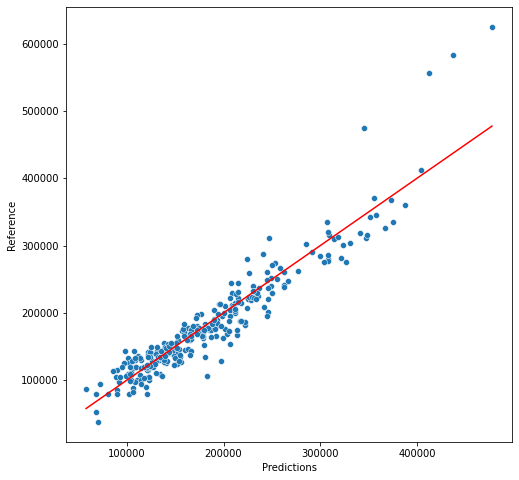

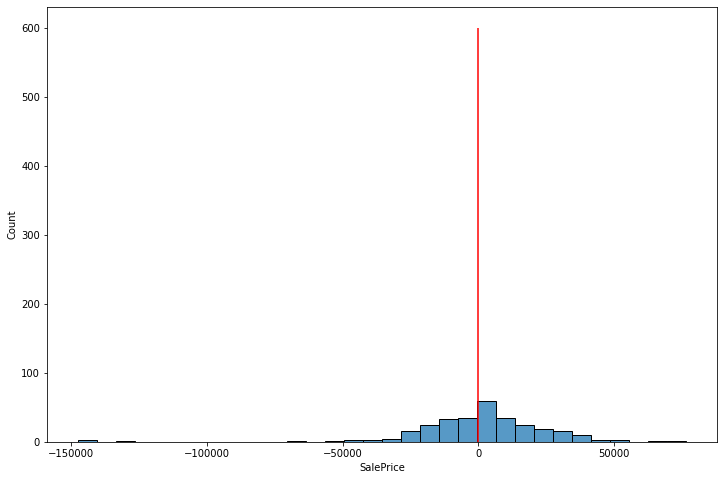

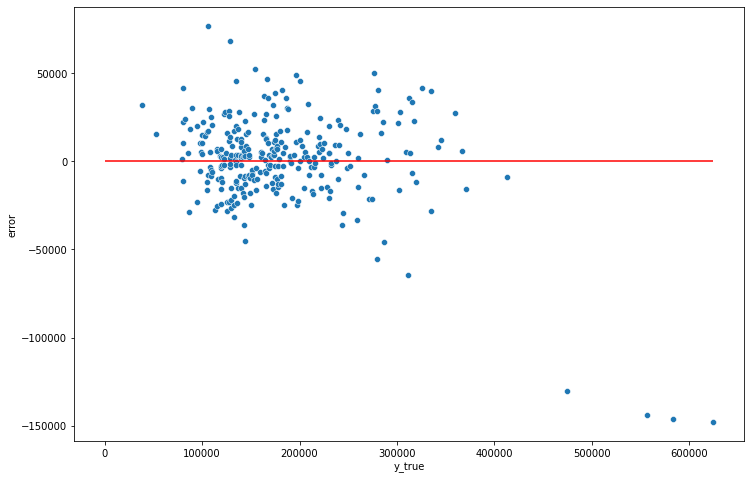

{'mse': 667488112.1581452,
 'rmse': 25835.79130118033,
 'mae': 16793.382699581376,
 'mape': 0.09896449274538406,
 'R squared': 0.8919854855416322}

In [ ]:
def mean_abs_perc_error(y_true, y_pred):
    results = pd.DataFrame({
        'predictions':y_pred,
        'true_values':y_true
    })
    mape_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions)/x.true_values)
               .agg({'diff':{'sum','count'}}))
    mape = mape_pre.loc['sum'] / mape_pre.loc['count']
    return mape.values[0]


def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_abs_perc_error(y_true, y_pred)}
        R_squared: {r2_score(y_true, y_pred) }
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=600, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_abs_perc_error(y_true, y_pred),
        'R squared': r2_score(y_true, y_pred)
    }

    

# plot_predictions(y_test, results['predictions'])

plot_predictions(y_test, lr_search.predict(X_test))

# Feature Selection with K-Best and tuned models

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

## with pipeline

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
preprocessor.fit(X)

X_fs = preprocessor.transform(X)


df_X_fs = pd.DataFrame.sparse.from_spmatrix(X_fs)
X_fs.shape

(1460, 304)

In [ ]:
f_stat, p_val = f_regression(df_X_fs, y)

f_test = pd.DataFrame({"f_stat":f_stat, 
                       "p_val":p_val}, 
                      )

f_test.sort_values("f_stat", ascending=False).head(5)

,f_stat,p_val
3,"2,436.7705909064957",2.18567526794e-313
15,"1,470.5850099553008",4.518033646758637e-223
25,"1,013.7056661611631",2.4986441669127798e-169
26,926.951287273264,5.26503816797602e-158
11,880.3412823895951,9.484229391455097e-152


In [ ]:
KBest = SelectKBest(score_func=f_regression, k=150)

# transform train set
train_X_KBest = KBest.fit_transform(X_fs, y)

print(train_X_KBest.shape)

(1460, 150)


In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline 


kbest = SelectKBest(score_func= f_regression)
lr_full_pipeline = make_pipeline(preprocessor, 
                              LinearRegression()) #('kbest', kbest),

param_grid = {
 "columntransformer__num_pipe__simpleimputer__strategy":["mean"]
}


lr_search = GridSearchCV(lr_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      scoring="neg_root_mean_squared_error")

lr_search.fit(X, y)


lr_search.best_score_

lr_search.best_params_

print(
        f"""
        best_k : {lr_search.best_params_}
        best_score_: {lr_search.best_score_}
        MSE: {mean_squared_error(y, lr_search.predict(X))}
        RMSE: {mean_squared_error(y, lr_search.predict(X)) **0.5}
        RMSE: {mean_squared_error(y, lr_search.predict(X), squared=False)}
        RMSE_log:{mean_squared_log_error(y, lr_search.predict(X), squared=False)}
        MAE: {mean_absolute_error(y, lr_search.predict(X))}
        R2 Score: {r2_score(y, lr_search.predict(X))}
        """
    )

Fitting 5 folds for each of 1 candidates, totalling 5 fits

        best_k : {'columntransformer__num_pipe__simpleimputer__strategy': 'mean'}
        best_score_: -35379.44160249916
        MSE: 449756308.318842
        RMSE: 21207.458789747583
        RMSE: 21207.458789747583
        RMSE_log:0.11477262294322071
        MAE: 13812.31752365372
        R2 Score: 0.9286869533943745
        


In [ ]:
performances.loc["Kbest_ln_reg_GS"] = r2_score(y_test, lr_search.predict(X_test))
performances.loc["Kbest_tree_GS"] = r2_score(y_test, dt_search.predict(X_test))
performances.loc["Kbest_knn_GS"] = r2_score(y_test, knn_search.predict(X_test))

performances

,r2_score
Baseline_ln_reg,0.8919854855416322
Baseline_tree,0.7185654479488696
Baseline_knn,0.5679902982777083
Kbest_ln_reg_GS,0.9313447470833609
Kbest_tree_GS,0.7185654479488696
Kbest_knn_GS,0.5679902982777083


In [ ]:
y = list(range(1,4))
y

[1, 2, 3]

In [ ]:
len(range(95,111,2))

8

In [ ]:
# Random Forest

rf_full_pipeline = make_pipeline(preprocessor, SelectKBest(score_func=f_regression, k=150), 
                              RandomForestRegressor())

param_grid = {

}

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["median"],
    "randomforestregressor__max_depth": range(13,15),
    #"randomforestregressor__min_samples_leaf": [1,2], # maybe go higher, default in R is 5 
    #"randomforestregressor__min_samples_split": [13, 14],
    "randomforestregressor__criterion": ["squared_error"],
    "randomforestregressor__max_features": ["auto"], 
    "randomforestregressor__n_estimators": [150],
    "randomforestregressor__bootstrap": [True],
    "selectkbest__k": [185]
}


rf_search = GridSearchCV(rf_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1,
                      scoring="neg_root_mean_squared_error")

rf_search.fit(X, y)

rf_search.best_score_

rf_search.best_params_

print(
        f"""
        best_k : {rf_search.best_params_}
        best_score_: {rf_search.best_score_}
        MSE: {mean_squared_error(y, rf_search.predict(X))}
        RMSE: {mean_squared_error(y, rf_search.predict(X)) **0.5}
        RMSE: {mean_squared_error(y, rf_search.predict(X), squared=False)}
        RMSE_log:{mean_squared_log_error(y, rf_search.predict(X), squared=False)}
        MAE: {mean_absolute_error(y, rf_search.predict(X))}
        R2 Score: {r2_score(y, rf_search.predict(X))}
        """
    )

ValueError: ignored

# XGB without Feature Selection

In [ ]:
xgb.XGBRegressor().get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'importance_type', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

In [ ]:
# X(treme) gradient boosting
import xgboost as xgb

xgb_full_pipeline = make_pipeline(preprocessor, xgb.XGBRegressor(objective="reg:squarederror", random_state=42))

param_grid = {

}

param_grid = {
     "columntransformer__num_pipe__simpleimputer__strategy":["median"],
     "xgbregressor__n_estimators": [200, 250], 
     "xgbregressor__colsample_bytree": [0.7],
     "xgbregressor__colsample_bylevel": [0.7],
    #"xgbregressor__gamma": [0, 0.5],
    "xgbregressor__learning_rate": [0.08, 0.085, 0.09], # default 0.1 
    #"xgbregressor__subsample": [1],
    "xgbregressor__min_child_weight": [2, 3, 4], 
    "xgbregressor__max_depth": [4, 5, 6] # default 
    #"selectkbest__k": [185]
}


xgb_search = GridSearchCV(xgb_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1,
                      scoring="neg_root_mean_squared_error")

xgb_search.fit(X, y)

xgb_search.best_score_

xgb_search.best_params_

print(
        f"""
        best_k : {xgb_search.best_params_}
        best_score_: {xgb_search.best_score_}
        MSE: {mean_squared_error(y, xgb_search.predict(X))}
        RMSE: {mean_squared_error(y, xgb_search.predict(X)) **0.5}
        RMSE: {mean_squared_error(y, xgb_search.predict(X), squared=False)}
        RMSE_log:{mean_squared_log_error(y, xgb_search.predict(X), squared=False)}
        MAE: {mean_absolute_error(y, xgb_search.predict(X))}
        R2 Score: {r2_score(y, xgb_search.predict(X))}
        """
    )

Fitting 5 folds for each of 54 candidates, totalling 270 fits

        best_k : {'columntransformer__num_pipe__simpleimputer__strategy': 'median', 'xgbregressor__colsample_bylevel': 0.7, 'xgbregressor__colsample_bytree': 0.7, 'xgbregressor__learning_rate': 0.08, 'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 3, 'xgbregressor__n_estimators': 250}
        best_score_: -24745.603622171686
        MSE: 36980516.45535346
        RMSE: 6081.160781902865
        RMSE: 6081.160781902865
        RMSE_log:0.040920209465675365
        MAE: 4354.393533283391
        R2 Score: 0.9941363950995188
        


In [ ]:
# X(treme) gradient boosting
import xgboost as xgb

xgb2_full_pipeline = make_pipeline(preprocessor, xgb.XGBRegressor(objective="reg:squarederror", random_state=42))


param_grid = {
     "columntransformer__num_pipe__simpleimputer__strategy":["median"],
     "xgbregressor__n_estimators": [250], 
     "xgbregressor__colsample_bytree": [0.6, 0.7],
     "xgbregressor__colsample_bylevel": [0.7],
    #"xgbregressor__gamma": [0, 0.5],
    "xgbregressor__learning_rate": [0.05], # default 0.1 
    #"xgbregressor__subsample": [1],
    "xgbregressor__min_child_weight": [3], 
    "xgbregressor__max_depth": [3] # default 
    #"selectkbest__k": [185]
}


xgb2_search = GridSearchCV(xgb_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1,
                      scoring="neg_root_mean_squared_error")

xgb2_search.fit(X, y)

xgb2_search.best_score_

xgb2_search.best_params_

print(
        f"""
        best_k : {xgb2_search.best_params_}
        best_score_: {xgb2_search.best_score_}
        MSE: {mean_squared_error(y, xgb2_search.predict(X))}
        RMSE: {mean_squared_error(y, xgb2_search.predict(X)) **0.5}
        RMSE: {mean_squared_error(y, xgb2_search.predict(X), squared=False)}
        RMSE_log:{mean_squared_log_error(y, xgb2_search.predict(X), squared=False)}
        MAE: {mean_absolute_error(y, xgb2_search.predict(X))}
        R2 Score: {r2_score(y, xgb2_search.predict(X))}
        """
    )

Fitting 5 folds for each of 2 candidates, totalling 10 fits

        best_k : {'columntransformer__num_pipe__simpleimputer__strategy': 'median', 'xgbregressor__colsample_bylevel': 0.7, 'xgbregressor__colsample_bytree': 0.7, 'xgbregressor__learning_rate': 0.05, 'xgbregressor__max_depth': 3, 'xgbregressor__min_child_weight': 3, 'xgbregressor__n_estimators': 250}
        best_score_: -26057.106413232126
        MSE: 209888748.85456866
        RMSE: 14487.537708477885
        RMSE: 14487.537708477885
        RMSE_log:0.08770397514191784
        MAE: 10264.538479238014
        R2 Score: 0.9667201863493345
        


In [ ]:
performances.loc["XGboost_tuned_5"] = r2_score(y_test, xgb2_search.predict(X_test))
performances

,r2_score
Baseline_ln_reg,0.8919854855416322
Baseline_tree,0.7205011901519489
Baseline_knn,0.5679902982777083
XGboost_tuned_4,0.040920209465675365
Neural_network,0.7530654810602326
XGboost_tuned_5,0.9676923808201617


## Neural Network: 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler()
)
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

In [ ]:
preprocessor.fit(X)

X_NN = preprocessor.transform(X)


X_NN_df = pd.DataFrame.sparse.from_spmatrix(X_NN)
X_NN_df.shape

(1460, 304)

In [ ]:
X_NN_df.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Series([], dtype: float64)

#### Feature Selection: 

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.05)
X_NN_df_selected = selector.fit_transform(X_NN_df)

In [ ]:
# those are the indices of the columns kept
kept_columns = selector.get_support(indices=True)
kept_columns

array([  0,   6,  19,  34,  35,  39,  40,  44,  46,  49,  53,  56,  57,
        60,  61,  69,  71,  72,  76,  81,  85,  90,  91, 106, 110, 111,
       113, 116, 120, 122, 139, 141, 142, 145, 146, 154, 156, 158, 161,
       162, 165, 167, 168, 171, 172, 175, 177, 178, 179, 180, 184, 186,
       188, 193, 194, 195, 196, 198, 199, 200, 201, 204, 205, 212, 219,
       221, 223, 224, 225, 226, 231, 232, 234, 235, 242, 245, 246, 248,
       250, 252, 254, 255, 256, 257, 258, 259, 263, 265, 269, 271, 272,
       274, 281, 283, 295, 297, 298, 302, 303])

In [ ]:
# those are the column names
kept_columns_names = X_NN_df.columns[kept_columns]
kept_columns_names

Int64Index([  0,   6,  19,  34,  35,  39,  40,  44,  46,  49,  53,  56,  57,
             60,  61,  69,  71,  72,  76,  81,  85,  90,  91, 106, 110, 111,
            113, 116, 120, 122, 139, 141, 142, 145, 146, 154, 156, 158, 161,
            162, 165, 167, 168, 171, 172, 175, 177, 178, 179, 180, 184, 186,
            188, 193, 194, 195, 196, 198, 199, 200, 201, 204, 205, 212, 219,
            221, 223, 224, 225, 226, 231, 232, 234, 235, 242, 245, 246, 248,
            250, 252, 254, 255, 256, 257, 258, 259, 263, 265, 269, 271, 272,
            274, 281, 283, 295, 297, 298, 302, 303],
           dtype='int64')

In [ ]:
X_NN_df_selected = pd.DataFrame(X_NN_df, columns=kept_columns_names)
X_NN_df_selected

,0,6,19,34,35,39,40,44,46,49,53,56,57,60,61,...,258,259,263,265,269,271,272,274,281,283,295,297,298,302,303
0,0.2352941176470588,0.8833333333333329,0.5,0.09090909090909091,0.5,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.43333333333333,0.0,0.36363636363636365,0.25,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.2352941176470588,0.8666666666666671,0.5,0.7272727272727273,0.5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.2941176470588235,0.3333333333333357,0.0,0.09090909090909091,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.2352941176470588,0.8333333333333357,0.5,0.9999999999999999,0.5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.2352941176470588,0.8333333333333357,0.5,0.6363636363636364,0.25,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1456,0.0,0.6333333333333329,0.0,0.09090909090909091,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1457,0.2941176470588235,0.93333333333333,0.0,0.36363636363636365,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1458,0.0,0.7666666666666657,0.0,0.2727272727272727,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X_NN_df_selected, y, test_size=0.2, random_state=123)

In [ ]:
import tensorflow as tf

In [ ]:
X_train_tensor = tf.convert_to_tensor(X_train.values)
X_train_tensor

<tf.Tensor: shape=(1168, 99), dtype=float64, numpy=
array([[0.23529412, 0.71666667, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.61666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.75      , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.88333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.38235294, 0.95      , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.17647059, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])>

In [ ]:
y_train_tensor = tf.convert_to_tensor(y_train)
y_train_tensor

<tf.Tensor: shape=(1168,), dtype=int64, numpy=array([260000, 181900, 272000, ..., 262500, 133000, 131000])>

In [ ]:
X_test_tensor = tf.convert_to_tensor(X_test.values)
X_test_tensor

<tf.Tensor: shape=(292, 99), dtype=float64, numpy=
array([[0.23529412, 0.85      , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.29411765, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.82352941, 0.9       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.17647059, 0.93333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.31666667, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17647059, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])>

In [ ]:
y_train_tensor = tf.convert_to_tensor(y_train)
y_train_tensor

<tf.Tensor: shape=(1168,), dtype=int64, numpy=array([260000, 181900, 272000, ..., 262500, 133000, 131000])>

In [ ]:
y_test_tensor = tf.convert_to_tensor(y_test)
y_test_tensor

<tf.Tensor: shape=(292,), dtype=int64, numpy=
array([222500,  87000, 130000, 274300, 140000, 259000, 309000, 127500,
       155000, 147000, 159000, 220000, 140000, 108000, 260000, 207500,
       115000, 325624, 212000, 167900, 151000, 162900, 109500, 143000,
       230000, 145000, 208900, 181000, 129900, 107000, 149350, 182000,
       143000, 198900, 367294, 190000, 173000, 475000, 176500, 101000,
       144000, 174000, 215000, 165000, 215000, 135750, 311872, 248000,
       239900, 116000, 200000, 196000, 140000, 143000,  89500, 153000,
       144000, 168000, 228000, 360000, 108000, 345000, 122000, 167000,
       244000, 140000, 120000, 279500, 232600, 140000, 135000, 129000,
       171900, 250000, 169500, 140000, 183200, 140000, 210000, 133000,
       313000, 284000,  85500, 125000, 168000, 140000,  98000, 129000,
        52500, 302000, 127500, 181000, 178000, 163000, 153337, 119500,
       244400, 109500, 219210, 133500, 104900, 582933, 342643, 148000,
       207500, 115000, 129000, 

In [ ]:
# try 2/3 the iput nodes + output nodes

deep_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=60, activation="relu"),
    tf.keras.layers.Dense(units=60, activation="relu"),
    tf.keras.layers.Dense(units=1)
])

In [ ]:
deep_model_3.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.05),
    loss='mean_absolute_error')

In [ ]:
%%time
history = deep_model_3.fit(
    X_train_tensor, y_train_tensor,
    epochs=50,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 6.59 s, sys: 328 ms, total: 6.92 s
Wall time: 6.68 s


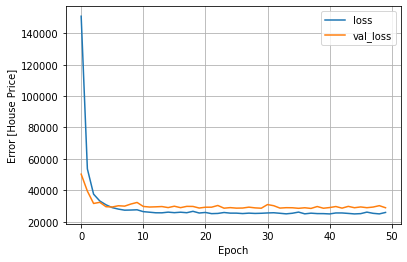

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [House Price]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
performances.loc["Neural_network"] = r2_score(y_test, deep_model_3.predict(X_test))
performances

10/10 [==============================] - 0s 2ms/step


,r2_score
Baseline_ln_reg,0.8919854855416322
Baseline_tree,0.7205011901519489
Baseline_knn,0.5679902982777083
XGboost_tuned_4,0.040920209465675365
Neural_network,0.7530654810602326


# Submission

In [ ]:
submission = pd.DataFrame(columns=["Id", "SalePrice"])

In [ ]:
url = "https://drive.google.com/file/d/1fOdT7-Nev6wWiOfynV3dy7RDR4rOSE69/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
test_data =  pd.read_csv(path)

In [ ]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
submission['Id'] = test_data['Id'] 

In [ ]:
submission

,Id,SalePrice
0,1461,NaN
1,1462,NaN
2,1463,NaN
3,1464,NaN
4,1465,NaN
...,...,...
1454,2915,NaN
1455,2916,NaN
1456,2917,NaN
1457,2918,NaN


In [ ]:
test_data.drop(['Id'], axis=1, inplace=True)

KeyError: ignored

In [ ]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,...,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,...,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,...,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,...,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,...,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,...,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,...,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,...,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,...,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
pred = xgb_search.predict(test_data)

In [ ]:
submission['SalePrice'] = pred

In [ ]:
submission

,Id,SalePrice
0,1461,"124,353.5234375"
1,1462,"157,923.484375"
2,1463,"185,954.9375"
3,1464,"195,870.53125"
4,1465,"192,259.453125"
...,...,...
1454,2915,"76,714.9921875"
1455,2916,"77,650.671875"
1456,2917,"159,376.125"
1457,2918,"121,151.8515625"


In [ ]:
#submission.to_csv("submission.csv", index=False)

In [ ]:
from google.colab import files
submission.to_csv('submission_init.csv', index=False) 
files.download('submission_init.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>